In [2]:
##  Q1

#Given vector example :
#   [1,3,"rt",4,2,3,4,2,1]

#We need to associate a probability to each symbol in the vector

import math

v = [1,2,3,4,5]

def getProba(v):
    probDict = {}
    l = len(v)
    for symbol in v :
        if symbol in probDict:
            probDict[symbol]+=1
        else:
            probDict[symbol]=1
            
    for key in probDict :
        probDict[key] = probDict[key]/l 
            
    return probDict

def getEntropy(v):
    probDict = getProba(v)
    H = 0
    for symbol in probDict :
        # print(f"symbol = {symbol}")
        # print(probDict[symbol])
        # print(math.log(probDict[symbol], 10))
        # print(-probDict[symbol]*math.log(probDict[symbol], 10))

        H += -probDict[symbol]*math.log(probDict[symbol],2)
    
    print(H)
    return H

getEntropy(v)


2.321928094887362


2.321928094887362

In [3]:
##  Q2

#Checking the function on a long vector
import numpy as np
randnums= np.random.randint(0,2,10000)
print(randnums)
getEntropy(randnums)


[1 1 0 ... 1 0 0]
0.9999415700620251


0.9999415700620251

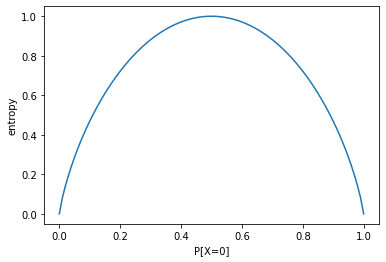

In [4]:
## Q3

import matplotlib.pyplot as plt
def getBinaryTuple(alpha):
    return {0:alpha, 1: 1-alpha}

def getEntropyFromTuple(entry_tuple):
    H = 0
    for symbol in entry_tuple:
        if(entry_tuple[symbol]==0 or entry_tuple[symbol]==1):
            return 0
        H += -entry_tuple[symbol]*math.log(entry_tuple[symbol], 2)

    return(H)

alphaArr = np.linspace(0, 1, num=101)

tupleArr = []

for alpha in alphaArr :
    tupleArr.append(getBinaryTuple(alpha))

entropyArr = []

for etuple in tupleArr:
    entropyArr.append(getEntropyFromTuple(etuple))


plt.plot(alphaArr,entropyArr)
plt.ylabel('entropy')
plt.xlabel('P[X=0]')
plt.show()


We have :

p_0 = p_0 * p_00 + p_1 * p_01
p_1 = p_1 * p_10 + p_1 * p_11

We end up with : 

p0 = p01/(p01-p00+1)
p1 = (1-p0)/(1-p00+p01)

We know : 

p_10 = 1 - p_00
p_11 = 1 - p_01

So,

H(x_k)=[-p00log2(p00) - p10.log(p10)].p0 + [-p01.log2(p01) - p11.log(p11)].p1

becomes

H(x_k) = [-p00log2(p00) - (1 - p_00).log(1 - p_00)].p01/(p01-p00+1) + [-p01.log2(p01) - (1 - p_01).log(1 - p_01)].(1-p00)/(1-p00+p01)


In [5]:
import PIL
import numpy
print('Pillow Version:', PIL.__version__)

png = PIL.Image.open('scan.png')
print(png.format)
#png.show()

png_data=numpy.asarray(png)
print(png_data.shape)
print(png_data[0][230])

whitepixels = 0
blackpixels = 0
currentpixel = 0
zero2zero = 0
zero2one = 0
one2zero = 0
one2one = 0

for line in png_data:
    for pixel in line:
        if pixel==1 :
            whitepixels += 1
            if currentpixel==1:
                one2one += 1
            else :
                zero2one += 1
            currentpixel = 1
        else :
            blackpixels+=1
            if currentpixel==0:
                zero2zero += 1
            else:
                one2zero += 1
            currentpixel = 0



print(f"white pixel count = {whitepixels}")
print(f"black pixel count = {blackpixels}")
print(f"p1 (white pixel) = {whitepixels/(whitepixels+blackpixels)}")
print(f"p0 (black pixel) = {blackpixels/(whitepixels+blackpixels)}")

print(f"zero2zero = {zero2zero}, zero2one = {zero2one}, one2zero = {one2zero}, one2one = {one2one}")

print(f"p00 = {zero2zero/(zero2one+zero2zero)}")
print(f"p01 = {one2zero/(one2zero+one2one)}")

p00 = zero2zero/(zero2one+zero2zero)
p01 = one2zero/(one2zero+one2one)


Pillow Version: 8.4.0
PNG
(3300, 2550)
1
white pixel count = 8000222
black pixel count = 414778
p1 (white pixel) = 0.9507096850861557
p0 (black pixel) = 0.04929031491384433
zero2zero = 307881, zero2one = 106898, one2zero = 106897, one2one = 7893324
p00 = 0.7422772126843452
p01 = 0.013361755881493773


In [9]:
H = (-1*p00*math.log(p00, 2) - (1 - p00)*math.log(p00, 2))*p01/(p01-p00+1) + \
    (-1*p01*math.log(p01, 2) - (1 - p01)*math.log(1-p01, 2))*(1-p00)/(1-p00+p01)
print("Entropy with memory = ",H)


Entropy with memory =  0.1184836346037452


In [10]:
flattened_png = []

for line in png_data:
    for pixel in line:
        flattened_png.append(pixel)

In [11]:
print("Entropy without Memory =",getEntropy(flattened_png))


0.2833745831777161
Entropy without Memory = 0.2833745831777161


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

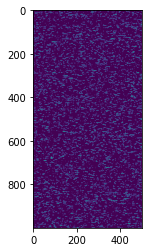

In [12]:
#Engendrer image avec matrice de Markov
import random
import matplotlib.pyplot as plt

def createPNGFromMarkovMat(initpixel,width,height):
    if initpixel == -1:
        currentpixel = [random.randint(0, 1)]
    else :
        currentpixel = [initpixel]

    png_data = []

    for k in range(height):
        line = []
        for i in range(width):

            newpix = random.uniform(0, 1)
            if currentpixel == 0:
                if newpix < p00 :
                    line.append(1)
                else :
                    line.append(0)
                    currentpixel = 1
            else :
                if newpix < p01 :
                    line.append(1)
                    currentpixel = 0
                else :
                    line.append(0)

        png_data.append(line)

    png_data=numpy.array(png_data)

    plt.imshow(png_data)  # Needs to be in row,col order
    plt.savefig("test", dpi=300)

    return png_data
    
createPNGFromMarkovMat(-1,500,1000)



In [13]:
#Implementing RLE

#Input = a 2 dimensions array
def RLE_encoder(png_data):
    #flattening the data :
    RLE_data = []
    currentpixel = png_data[0][0]
    RLE_data.append((1,currentpixel))

    for line in png_data:
        for pixel in line:
            if pixel==currentpixel :
                #we increment the last stored tuple
                tmp_tup = RLE_data[-1]
                RLE_data[-1] = (tmp_tup[0]+1,tmp_tup[1])
            else :
                #we add the new sequence beginning to the RLE array
                RLE_data.append((1,pixel))
                currentpixel = pixel
    return RLE_data



In [14]:
#Input = a 2 dimensions array
def RLE_decoder(png_encoded,width,height):
    #flattening the data :
    png_data_flat = []
    png_data = []

    for tuple_ in png_encoded:
        for k in range(tuple_[0]):
            png_data_flat.append(tuple_[1])
    
    #deflattening the tuple
    pixel_index = 0
    for linenb in range(height):
        line=[]
        for pixelnb in range(width):
            line.append(png_data_flat[pixel_index])
            pixel_index+=1
        png_data.append(line)

    return png_data


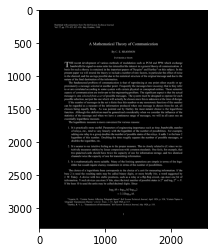

In [15]:
png = PIL.Image.open('scan.png')
png_data = numpy.asarray(png)

Encoded = RLE_encoder(png_data)

Decoded = RLE_decoder(Encoded, png_data.shape[1], png_data.shape[0])

plt.imshow(Decoded, cmap="binary")  # Needs to be in row,col order

plt.savefig("decoded", dpi=300)
